<a href="https://www.kaggle.com/code/samithsachidanandan/income-prediction-in-python?scriptVersionId=267335637" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

### Importing necessary libraries 

In [199]:
import pandas as pd 

### Loading the data

In [200]:
df = pd.read_csv("/kaggle/input/income/train.csv")


In [201]:
df.shape

(43957, 15)

In [202]:
df.head()


,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income_>50K
0,67,Private,366425,Doctorate,16,Divorced,Exec-managerial,Not-in-family,White,Male,99999,0,60,United-States,1
1,17,Private,244602,12th,8,Never-married,Other-service,Own-child,White,Male,0,0,15,United-States,0
2,31,Private,174201,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,40,United-States,1
3,58,State-gov,110199,7th-8th,4,Married-civ-spouse,Transport-moving,Husband,White,Male,0,0,40,United-States,0
4,25,State-gov,149248,Some-college,10,Never-married,Other-service,Not-in-family,Black,Male,0,0,40,United-States,0


In [203]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43957 entries, 0 to 43956
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              43957 non-null  int64 
 1   workclass        41459 non-null  object
 2   fnlwgt           43957 non-null  int64 
 3   education        43957 non-null  object
 4   educational-num  43957 non-null  int64 
 5   marital-status   43957 non-null  object
 6   occupation       41451 non-null  object
 7   relationship     43957 non-null  object
 8   race             43957 non-null  object
 9   gender           43957 non-null  object
 10  capital-gain     43957 non-null  int64 
 11  capital-loss     43957 non-null  int64 
 12  hours-per-week   43957 non-null  int64 
 13  native-country   43194 non-null  object
 14  income_>50K      43957 non-null  int64 
dtypes: int64(7), object(8)
memory usage: 5.0+ MB


In [204]:
df.describe()

,age,fnlwgt,educational-num,capital-gain,capital-loss,hours-per-week,income_>50K
count,43957.000000,4.395700e+04,43957.000000,43957.000000,43957.000000,43957.000000,43957.000000
mean,38.617149,1.896730e+05,10.074118,1093.559797,88.246491,40.407694,0.239279
std,13.734401,1.058215e+05,2.575092,7570.536063,404.588410,12.400303,0.426648
min,17.000000,1.349200e+04,1.000000,0.000000,0.000000,1.000000,0.000000
25%,28.000000,1.174960e+05,9.000000,0.000000,0.000000,40.000000,0.000000
50%,37.000000,1.781000e+05,10.000000,0.000000,0.000000,40.000000,0.000000
75%,48.000000,2.376710e+05,12.000000,0.000000,0.000000,45.000000,0.000000
max,90.000000,1.490400e+06,16.000000,99999.000000,4356.000000,99.000000,1.000000


In [205]:
df.isnull().sum()

age                   0
workclass          2498
fnlwgt                0
education             0
educational-num       0
marital-status        0
occupation         2506
relationship          0
race                  0
gender                0
capital-gain          0
capital-loss          0
hours-per-week        0
native-country      763
income_>50K           0
dtype: int64

In [206]:
df['workclass'].value_counts()

workclass
Private             30587
Self-emp-not-inc     3464
Local-gov            2822
State-gov            1756
Self-emp-inc         1518
Federal-gov          1284
Without-pay            20
Never-worked            8
Name: count, dtype: int64

In [207]:
df['occupation'].value_counts()

occupation
Craft-repair         5519
Prof-specialty       5518
Exec-managerial      5506
Adm-clerical         5004
Sales                4965
Other-service        4448
Machine-op-inspct    2711
Transport-moving     2121
Handlers-cleaners    1878
Farming-fishing      1348
Tech-support         1321
Protective-serv       874
Priv-house-serv       225
Armed-Forces           13
Name: count, dtype: int64

### Handling the missing values

In [208]:
df['workclass'] = df['workclass'].fillna(df['workclass'].mode()[0])
df['occupation'] = df['occupation'].fillna(df['occupation'].mode()[0])
df['native-country'] = df['native-country'].fillna(df['native-country'].mode()[0])



### Handling the duplicates 

In [209]:
df.duplicated().sum()


46

In [210]:
df= df.drop_duplicates()

In [211]:
df.shape

(43911, 15)

In [212]:
df.apply(lambda x : len(x.unique()))

age                   74
workclass              8
fnlwgt             26646
education             16
educational-num       16
marital-status         7
occupation            14
relationship           6
race                   5
gender                 2
capital-gain         122
capital-loss          97
hours-per-week        94
native-country        41
income_>50K            2
dtype: int64

### Preprocessing - One Hot Encoding

In [213]:
df = df.drop('education', axis=1)

In [214]:
def one_hot_encode_categoricals(df, exclude_cols=None, drop_original=True, prefix_sep='_'):
    
    

    if exclude_cols is None:
        exclude_cols = []

    
    categorical_cols = df.select_dtypes(include=['object', 'category']).columns.tolist()

    
    encode_cols = [col for col in categorical_cols if col not in exclude_cols]

  
    df_encoded = pd.get_dummies(df, columns=encode_cols if drop_original else [], 
                                prefix_sep=prefix_sep, drop_first=False)

    return df_encoded

In [215]:
df = one_hot_encode_categoricals(df, exclude_cols=['gender', 'income_>50K'])

In [216]:
df

,age,fnlwgt,educational-num,gender,capital-gain,capital-loss,hours-per-week,income_>50K,workclass_Federal-gov,workclass_Local-gov,...,native-country_Portugal,native-country_Puerto-Rico,native-country_Scotland,native-country_South,native-country_Taiwan,native-country_Thailand,native-country_Trinadad&Tobago,native-country_United-States,native-country_Vietnam,native-country_Yugoslavia
0,67,366425,16,Male,99999,0,60,1,False,False,...,False,False,False,False,False,False,False,True,False,False
1,17,244602,8,Male,0,0,15,0,False,False,...,False,False,False,False,False,False,False,True,False,False
2,31,174201,13,Male,0,0,40,1,False,False,...,False,False,False,False,False,False,False,True,False,False
3,58,110199,4,Male,0,0,40,0,False,False,...,False,False,False,False,False,False,False,True,False,False
4,25,149248,10,Male,0,0,40,0,False,False,...,False,False,False,False,False,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43952,52,68982,13,Male,0,0,50,1,False,False,...,False,False,False,False,False,False,False,True,False,False
43953,19,116562,9,Female,0,0,40,0,False,False,...,False,False,False,False,False,False,False,True,False,False
43954,30,197947,10,Male,0,0,58,0,False,False,...,False,False,False,False,False,False,False,True,False,False
43955,46,97883,13,Female,0,0,35,0,False,False,...,False,False,False,False,False,False,False,True,False,False


In [217]:
df['gender'] = df['gender'].apply(lambda x: 1 if x =='Male' else 0)


<Axes: >

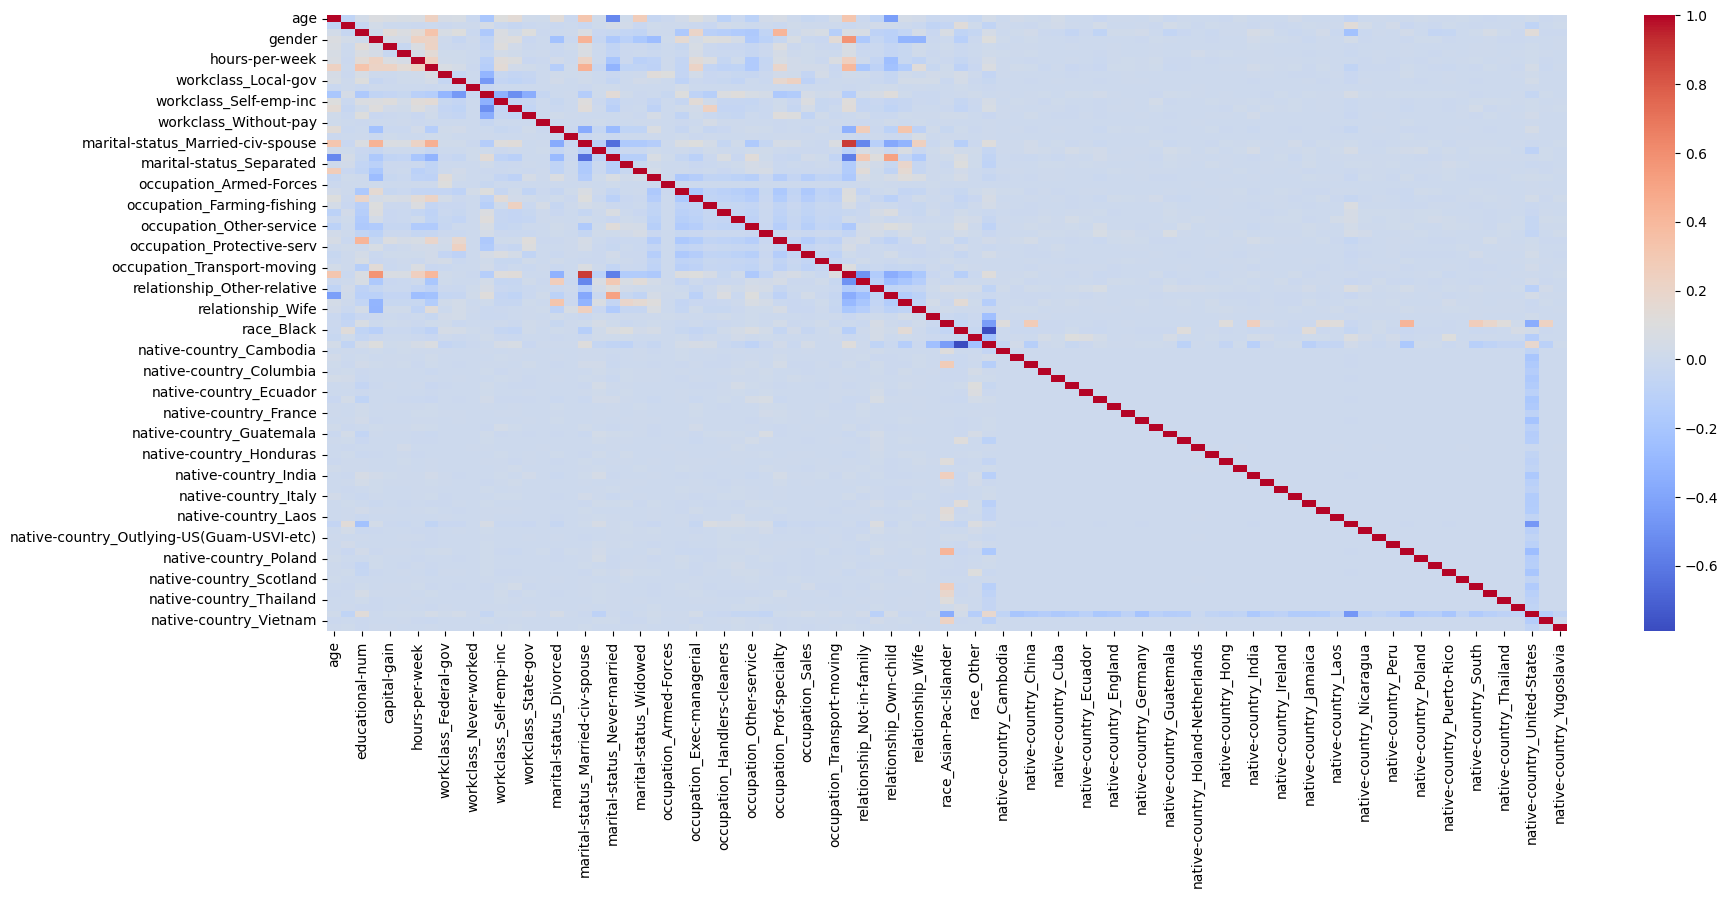

In [218]:
import seaborn as sns 
import matplotlib.pyplot as plt 

plt.figure(figsize=(20,8))
sns.heatmap(df.corr(), annot= False, cmap='coolwarm')


In [219]:
df.corr()

,age,fnlwgt,educational-num,gender,capital-gain,capital-loss,hours-per-week,income_>50K,workclass_Federal-gov,workclass_Local-gov,...,native-country_Portugal,native-country_Puerto-Rico,native-country_Scotland,native-country_South,native-country_Taiwan,native-country_Thailand,native-country_Trinadad&Tobago,native-country_United-States,native-country_Vietnam,native-country_Yugoslavia
age,1.000000,-0.076658,0.034332,0.088713,0.075797,0.056532,0.070633,0.230792,0.049847,0.061108,...,0.005435,0.004834,0.012767,-0.002334,-0.011202,-0.001753,-0.000947,0.014237,-0.012772,0.005909
fnlwgt,-0.076658,1.000000,-0.040654,0.028263,-0.003356,-0.006301,-0.011626,-0.006774,-0.010074,0.000742,...,-0.013782,0.008902,-0.006716,-0.010027,-0.000364,-0.002186,0.006545,-0.076740,-0.006656,0.006998
educational-num,0.034332,-0.040654,1.000000,0.008580,0.126811,0.080999,0.145951,0.334180,0.059107,0.100843,...,-0.049140,-0.042774,-0.000608,0.013063,0.043277,0.007860,-0.008562,0.132390,-0.011798,-0.008266
gender,0.088713,0.028263,0.008580,1.000000,0.045768,0.043817,0.227249,0.214567,0.003535,-0.040300,...,0.008643,-0.009184,-0.001644,-0.004181,0.001614,-0.008276,-0.010190,-0.006427,-0.002885,0.003010
capital-gain,0.075797,-0.003356,0.126811,0.045768,1.000000,-0.031541,0.082727,0.223354,-0.003048,-0.009361,...,-0.004608,-0.005916,-0.002258,0.003880,0.004625,-0.002861,-0.002814,0.010245,-0.002497,0.000040
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
native-country_Thailand,-0.001753,-0.002186,0.007860,-0.008276,-0.002861,-0.002358,0.006725,-0.006114,-0.004462,-0.003122,...,-0.000943,-0.001588,-0.000535,-0.001259,-0.000935,1.000000,-0.000576,-0.084092,-0.001077,-0.000535
native-country_Trinadad&Tobago,-0.000947,0.006545,-0.008562,-0.010190,-0.002814,0.000994,-0.002465,-0.012561,0.002155,-0.001717,...,-0.000821,-0.001383,-0.000466,-0.001096,-0.000814,-0.000576,1.000000,-0.073237,-0.000938,-0.000466
native-country_United-States,0.014237,-0.076740,0.132390,-0.006427,0.010245,0.011876,0.009614,0.041332,0.017763,0.032948,...,-0.119985,-0.202114,-0.068058,-0.160149,-0.118963,-0.084092,-0.073237,1.000000,-0.137100,-0.068058
native-country_Vietnam,-0.012772,-0.006656,-0.011798,-0.002885,-0.002497,0.000842,-0.008193,-0.015862,-0.004043,-0.004325,...,-0.001537,-0.002590,-0.000872,-0.002052,-0.001524,-0.001077,-0.000938,-0.137100,1.000000,-0.000872


In [220]:
correlations = df.corr()['income_>50K'].abs()
sorted_correlations = correlations.sort_values()
num_cols_to_drop = int(0.8 * len(df.columns))
cols_to_drop = sorted_correlations.iloc[:num_cols_to_drop].index
df_dropped = df.drop(cols_to_drop, axis = 1)

<Axes: >

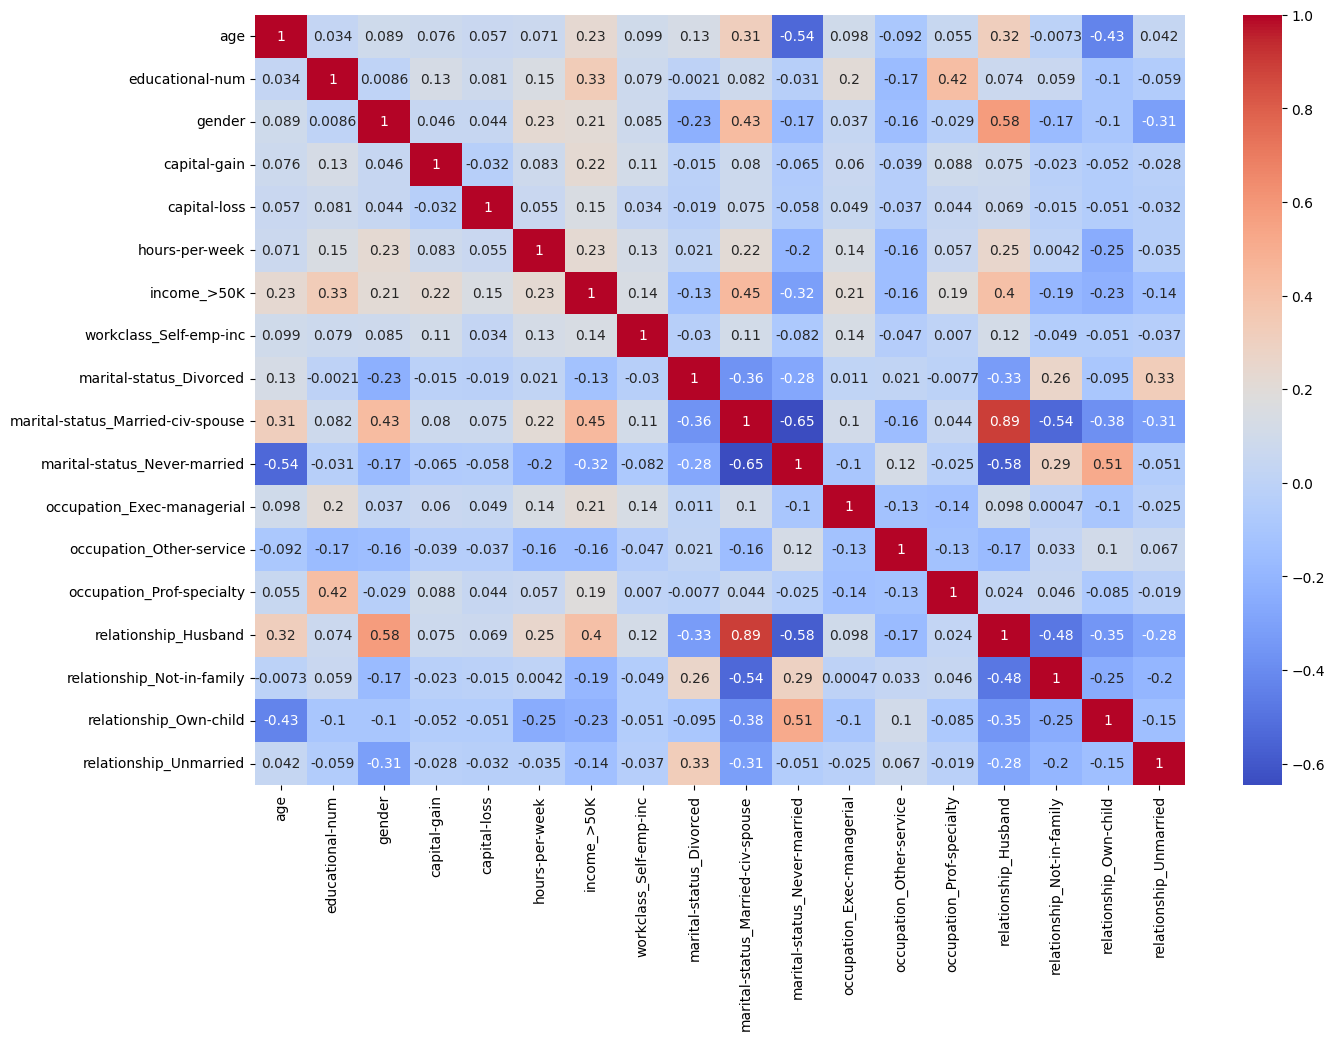

In [221]:
plt.figure(figsize=(15,10))
sns.heatmap(df_dropped.corr(), annot= True, cmap='coolwarm')

In [222]:
from sklearn.ensemble import RandomForestClassifier 
from sklearn.model_selection import train_test_split

df = df.drop('fnlwgt', axis=1)

train_df, test_df = train_test_split(df, test_size=0.2, random_state=42)



In [223]:
train_X = train_df.drop('income_>50K', axis=1)
train_y = train_df['income_>50K']

test_X = test_df.drop('income_>50K', axis=1)
test_y = test_df['income_>50K']

In [224]:
forest = RandomForestClassifier()

forest.fit(train_X,train_y )

RandomForestClassifier()

In [225]:
forest.score(test_X, test_y)

0.8466355459410224

In [226]:
forest.feature_importances_

array([2.31072411e-01, 1.32962894e-01, 1.38476988e-02, 1.09507737e-01,
       3.71029004e-02, 1.15267591e-01, 5.43956902e-03, 5.52574785e-03,
       9.54022137e-06, 9.27551898e-03, 6.23601869e-03, 8.01046102e-03,
       4.23010104e-03, 1.26561600e-04, 6.58355439e-03, 2.32632858e-04,
       6.97467545e-02, 1.01186211e-03, 3.18633836e-02, 1.87471430e-03,
       1.70793589e-03, 4.82845383e-03, 1.01272563e-04, 7.67693701e-03,
       1.87868476e-02, 4.25863781e-03, 2.89617159e-03, 4.48593840e-03,
       8.17989593e-03, 2.14913576e-04, 1.86949686e-02, 2.87510400e-03,
       6.11214185e-03, 4.40758988e-03, 4.35384626e-03, 4.04121372e-02,
       1.30121866e-02, 1.87614251e-03, 1.12249696e-02, 6.90915089e-03,
       7.73280064e-03, 1.35191136e-03, 2.94295647e-03, 4.54260445e-03,
       9.93736273e-04, 5.98594934e-03, 2.56857817e-04, 1.33201083e-03,
       6.10429350e-04, 2.76857350e-04, 8.08635859e-04, 2.64712070e-04,
       1.77559541e-04, 2.55567994e-04, 1.10938560e-03, 3.51097695e-04,
      

In [227]:
forest.feature_names_in_


array(['age', 'educational-num', 'gender', 'capital-gain', 'capital-loss',
       'hours-per-week', 'workclass_Federal-gov', 'workclass_Local-gov',
       'workclass_Never-worked', 'workclass_Private',
       'workclass_Self-emp-inc', 'workclass_Self-emp-not-inc',
       'workclass_State-gov', 'workclass_Without-pay',
       'marital-status_Divorced', 'marital-status_Married-AF-spouse',
       'marital-status_Married-civ-spouse',
       'marital-status_Married-spouse-absent',
       'marital-status_Never-married', 'marital-status_Separated',
       'marital-status_Widowed', 'occupation_Adm-clerical',
       'occupation_Armed-Forces', 'occupation_Craft-repair',
       'occupation_Exec-managerial', 'occupation_Farming-fishing',
       'occupation_Handlers-cleaners', 'occupation_Machine-op-inspct',
       'occupation_Other-service', 'occupation_Priv-house-serv',
       'occupation_Prof-specialty', 'occupation_Protective-serv',
       'occupation_Sales', 'occupation_Tech-support',
       '

In [228]:
importances = dict(zip(forest.feature_names_in_,forest.feature_importances_))
importances = {k: v for k, v in sorted(importances.items(), key= lambda x : x [1], reverse=True)}

In [229]:
importances

{'age': 0.23107241094340927,
 'educational-num': 0.13296289425501187,
 'hours-per-week': 0.11526759052740751,
 'capital-gain': 0.10950773711182245,
 'marital-status_Married-civ-spouse': 0.06974675451626548,
 'relationship_Husband': 0.04041213724083927,
 'capital-loss': 0.037102900393556196,
 'marital-status_Never-married': 0.031863383614001026,
 'occupation_Exec-managerial': 0.018786847640622936,
 'occupation_Prof-specialty': 0.018694968553237608,
 'gender': 0.013847698801121444,
 'relationship_Not-in-family': 0.013012186606127567,
 'relationship_Own-child': 0.01122496964338743,
 'workclass_Private': 0.009275518978400541,
 'occupation_Other-service': 0.008179895925719235,
 'workclass_Self-emp-not-inc': 0.008010461022827486,
 'relationship_Wife': 0.007732800637318007,
 'occupation_Craft-repair': 0.007676937012160848,
 'relationship_Unmarried': 0.006909150894537153,
 'marital-status_Divorced': 0.006583554393163759,
 'workclass_Self-emp-inc': 0.006236018688594254,
 'occupation_Sales': 0.0

In [231]:
from sklearn.model_selection import GridSearchCV


param_grid = {
    'n_estimators' : [50, 100, 250],
    'max_depth' : [None, 5, 10, 30],
    'min_samples_split' : [2, 4],
    'max_features' : [ 'sqrt', 'log2']
    
}

grid_search = GridSearchCV(estimator=RandomForestClassifier(), param_grid=param_grid,verbose=10)


In [233]:
grid_search.fit(train_X, train_y)


Fitting 5 folds for each of 48 candidates, totalling 240 fits
[CV 1/5; 1/48] START max_depth=None, max_features=sqrt, min_samples_split=2, n_estimators=50
[CV 1/5; 1/48] END max_depth=None, max_features=sqrt, min_samples_split=2, n_estimators=50;, score=0.849 total time=   2.0s
[CV 2/5; 1/48] START max_depth=None, max_features=sqrt, min_samples_split=2, n_estimators=50
[CV 2/5; 1/48] END max_depth=None, max_features=sqrt, min_samples_split=2, n_estimators=50;, score=0.849 total time=   2.0s
[CV 3/5; 1/48] START max_depth=None, max_features=sqrt, min_samples_split=2, n_estimators=50
[CV 3/5; 1/48] END max_depth=None, max_features=sqrt, min_samples_split=2, n_estimators=50;, score=0.849 total time=   1.9s
[CV 4/5; 1/48] START max_depth=None, max_features=sqrt, min_samples_split=2, n_estimators=50
[CV 4/5; 1/48] END max_depth=None, max_features=sqrt, min_samples_split=2, n_estimators=50;, score=0.849 total time=   1.9s
[CV 5/5; 1/48] START max_depth=None, max_features=sqrt, min_samples_sp

GridSearchCV(estimator=RandomForestClassifier(),
             param_grid={'max_depth': [None, 5, 10, 30],
                         'max_features': ['sqrt', 'log2'],
                         'min_samples_split': [2, 4],
                         'n_estimators': [50, 100, 250]},
             verbose=10)

In [238]:
forest = grid_search.best_estimator_

In [239]:
forest.score(test_X, test_y)

0.8616645793009222

In [240]:
importances = dict(zip(forest.feature_names_in_,forest.feature_importances_))
importances = {k: v for k, v in sorted(importances.items(), key= lambda x : x [1], reverse=True)}

In [241]:
importances

{'age': 0.15356338113501772,
 'capital-gain': 0.1320618309911913,
 'educational-num': 0.13128243304332837,
 'hours-per-week': 0.09327822365460987,
 'marital-status_Married-civ-spouse': 0.08714628761557192,
 'relationship_Husband': 0.0536391373141236,
 'capital-loss': 0.042646888307143624,
 'marital-status_Never-married': 0.03621007062739578,
 'occupation_Exec-managerial': 0.02616885435415752,
 'occupation_Prof-specialty': 0.023903319084500125,
 'relationship_Not-in-family': 0.018230254102757356,
 'gender': 0.017360439289102234,
 'relationship_Own-child': 0.012315063167849152,
 'occupation_Other-service': 0.010914901792113161,
 'relationship_Wife': 0.010789050620943529,
 'workclass_Private': 0.009836131452777383,
 'marital-status_Divorced': 0.009672781301276833,
 'relationship_Unmarried': 0.008001142025479803,
 'workclass_Self-emp-not-inc': 0.007912140177076872,
 'occupation_Craft-repair': 0.007695642951055955,
 'workclass_Self-emp-inc': 0.007503747612805461,
 'occupation_Sales': 0.0058